# Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time

from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_mutual_info_score

%matplotlib inline

## 1. Iris dataset

### 1.1. k-means Clustering

In [2]:
## Load iris dataset
iris = datasets.load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'],
      dtype='<U10')

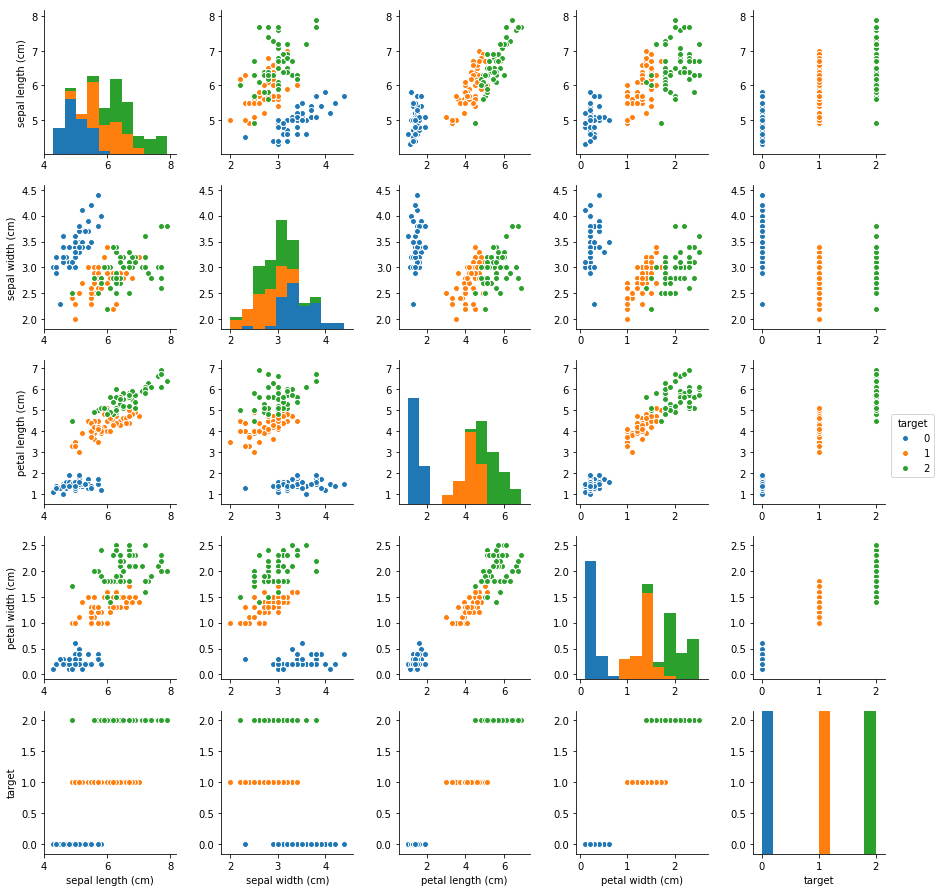

In [6]:
## Make iris dataframe
data = pd.DataFrame(iris.data, columns = iris.feature_names)
data['target'] = iris.target

## Plot iris data with seaborn
sns.pairplot(data, hue = 'target')
plt.show()

In [7]:
X = iris.data
y = iris.target

In [8]:
KMeans?

In [8]:
k_set = range(2,10)
names = []
models = []
results = []
silhouette_scores = []
mutual_scores = []
for k in k_set:
    # Add model name
    names.append('KMeans_with_k=%d' % k)
    # Call model
    model = KMeans(n_clusters = k, max_iter = 30, n_init = 10, verbose = 1, n_jobs = 1)
#     models.append(model)
    # Get cluster IDs 
#     model.fit(X)
#     result = model.predict(X)
    result = model.fit_predict(X)
    
    models.append(model)
    results.append(result)
    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(X, result, metric = 'euclidean'))
    # Calculate mutual_information
    mutual_scores.append(adjusted_mutual_info_score(y, result))

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 152.368706477
start iteration
done sorting
end inner loop
Iteration 1, inertia 152.368706477
center shift 0.000000e+00 within tolerance 1.134707e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 152.847861068
start iteration
done sorting
end inner loop
Iteration 1, inertia 152.368706477
start iteration
done sorting
end inner loop
Iteration 2, inertia 152.368706477
center shift 0.000000e+00 within tolerance 1.134707e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 155.0364
start iteration
done sorting
end inner loop
Iteration 1, inertia 152.847861068
start iteration
done sorting
end inner loop
Iteration 2, inertia 152.368706477
start iteration
done sorting
end inner loop
Iteration 3, inertia 152.368706477
center shift 0.000000e+00 within tolerance 1.134707e-04
Initialization complete
start iteration
done sorting
e

Iteration 2, inertia 57.3454093157
start iteration
done sorting
end inner loop
Iteration 3, inertia 57.3454093157
center shift 0.000000e+00 within tolerance 1.134707e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 67.5698002695
start iteration
done sorting
end inner loop
Iteration 1, inertia 61.5298659091
start iteration
done sorting
end inner loop
Iteration 2, inertia 60.2945944444
start iteration
done sorting
end inner loop
Iteration 3, inertia 59.786206271
start iteration
done sorting
end inner loop
Iteration 4, inertia 59.2281142857
start iteration
done sorting
end inner loop
Iteration 5, inertia 58.8983088235
start iteration
done sorting
end inner loop
Iteration 6, inertia 58.4344074212
start iteration
done sorting
end inner loop
Iteration 7, inertia 58.2589336922
start iteration
done sorting
end inner loop
Iteration 8, inertia 57.771663587
start iteration
done sorting
end inner loop
Iteration 9, inertia 57.669267536
start iteration
don

done sorting
end inner loop
Iteration 6, inertia 37.6065008772
start iteration
done sorting
end inner loop
Iteration 7, inertia 37.6065008772
center shift 0.000000e+00 within tolerance 1.134707e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 39.9483874269
start iteration
done sorting
end inner loop
Iteration 1, inertia 37.5932358974
start iteration
done sorting
end inner loop
Iteration 2, inertia 37.3609243438
start iteration
done sorting
end inner loop
Iteration 3, inertia 37.2030987179
start iteration
done sorting
end inner loop
Iteration 4, inertia 37.1529742591
start iteration
done sorting
end inner loop
Iteration 5, inertia 37.1281344322
start iteration
done sorting
end inner loop
Iteration 6, inertia 37.1281344322
center shift 0.000000e+00 within tolerance 1.134707e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 37.1712572983
start iteration
done sorting
end inner loop
Iteration 1, inertia 3

In [15]:
models[2].cluster_centers_

array([[ 6.2525    ,  2.855     ,  4.815     ,  1.625     ],
       [ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 6.9125    ,  3.1       ,  5.846875  ,  2.13125   ],
       [ 5.53214286,  2.63571429,  3.96071429,  1.22857143]])

In [16]:
silhouette_scores = pd.Series(silhouette_scores, index = names)
mutual_scores = pd.Series(mutual_scores, index = names)

In [17]:
silhouette_scores

KMeans_with_k=2    0.680814
KMeans_with_k=3    0.552592
KMeans_with_k=4    0.497826
KMeans_with_k=5    0.488518
KMeans_with_k=6    0.366504
KMeans_with_k=7    0.350876
KMeans_with_k=8    0.355571
KMeans_with_k=9    0.354195
dtype: float64

In [18]:
mutual_scores

KMeans_with_k=2    0.519361
KMeans_with_k=3    0.748372
KMeans_with_k=4    0.646896
KMeans_with_k=5    0.591789
KMeans_with_k=6    0.510087
KMeans_with_k=7    0.518960
KMeans_with_k=8    0.486896
KMeans_with_k=9    0.473855
dtype: float64

Clustering의 평가 방법으로 상당히 많은 것들이 존재합니다. 자세한 내용은 scikit-learn 공식 홈페이지 [Link](http://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)를 참고해주세요.

### 1.2. Hierarchical Agglomerative Clustering

In [19]:
k_set = range(2,10)
names = []
models = []
results = []
silhouette_scores = []
mutual_scores = []
for k in k_set:
    # Add model name
    names.append('HC_k=%d' % k)
    # Call model
    model = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean', linkage = 'ward')
#     models.append(model)
    # Get cluster IDs 
    result = model.fit_predict(X)
    models.append(model)
    results.append(result)
    # Calculate silhouette score
    silhouette_scores.append(silhouette_score(X, result, metric = 'euclidean'))
    # Calculate mutual_information
    mutual_scores.append(adjusted_mutual_info_score(y, result))

In [20]:
silhouette_scores = pd.Series(silhouette_scores, index = names)
mutual_scores = pd.Series(mutual_scores, index = names)

In [21]:
silhouette_scores

HC_k=2    0.686393
HC_k=3    0.554097
HC_k=4    0.488740
HC_k=5    0.484155
HC_k=6    0.361885
HC_k=7    0.344854
HC_k=8    0.346241
HC_k=9    0.333139
dtype: float64

In [22]:
mutual_scores

HC_k=2    0.576771
HC_k=3    0.757803
HC_k=4    0.636404
HC_k=5    0.571033
HC_k=6    0.492795
HC_k=7    0.472473
HC_k=8    0.452586
HC_k=9    0.432991
dtype: float64

- scikit-learn 내에 있는 AgglomerativeClustering은 dendrogram을 지원하지 않습니다.
- scipy를 활용하여 그림을 그려봅시다.

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [24]:
# generate the linkage matrix
Z = linkage(X, 'ward')

In [25]:
Z.shape

(149, 4)

In [26]:
Z[0:5]

array([[  9.00000000e+00,   3.40000000e+01,   0.00000000e+00,
          2.00000000e+00],
       [  3.70000000e+01,   1.50000000e+02,   0.00000000e+00,
          3.00000000e+00],
       [  1.01000000e+02,   1.42000000e+02,   0.00000000e+00,
          2.00000000e+00],
       [  7.00000000e+00,   3.90000000e+01,   1.00000000e-01,
          2.00000000e+00],
       [  0.00000000e+00,   1.70000000e+01,   1.00000000e-01,
          2.00000000e+00]])

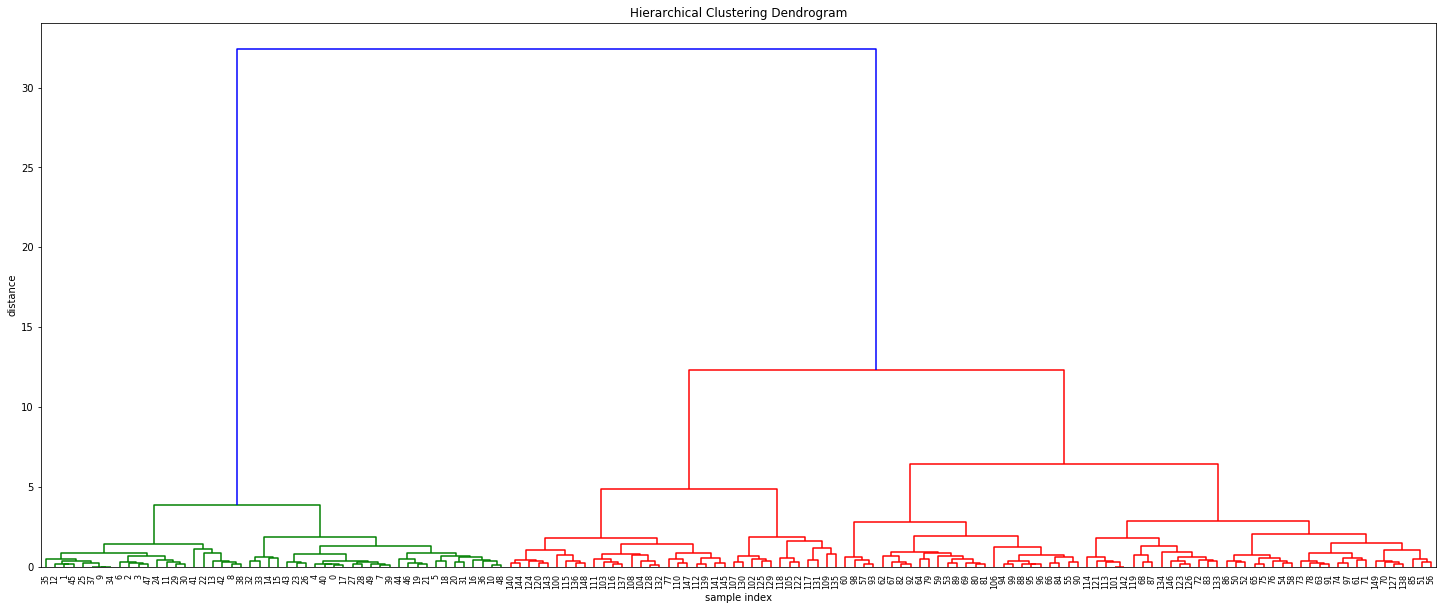

In [27]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    
)
plt.show()

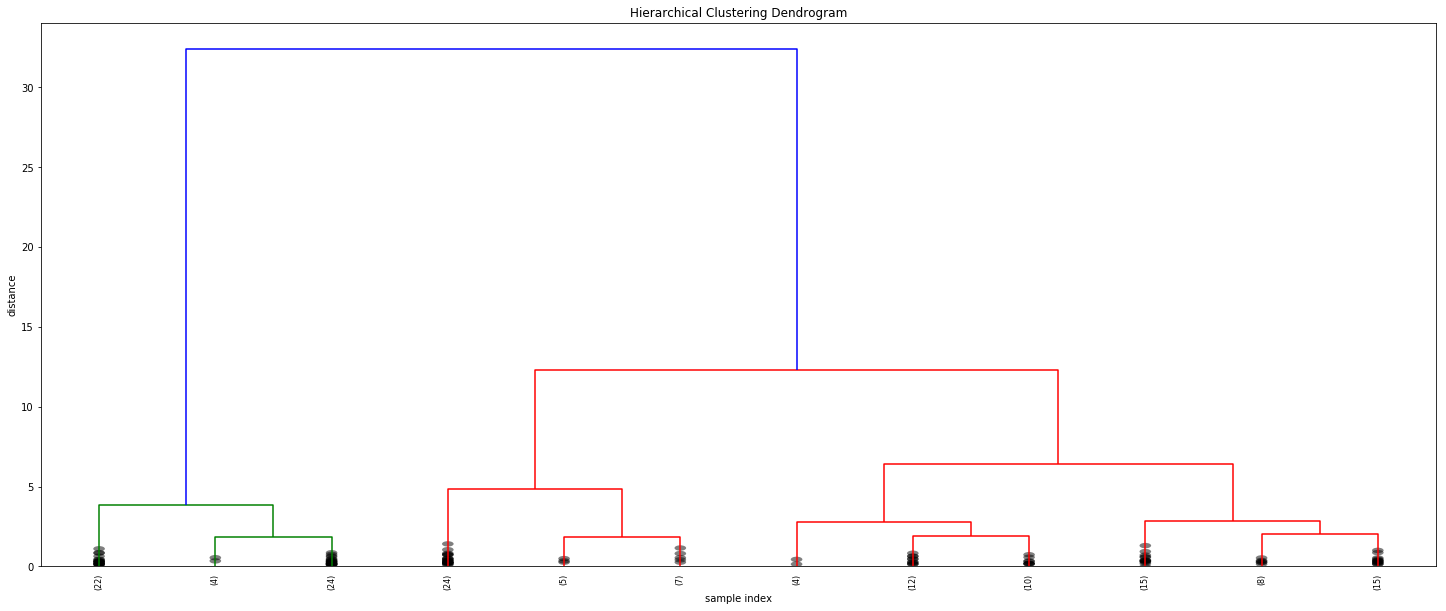

In [28]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    show_contracted = True
)
plt.show()

Use `fancy_dendrogram` function in [this page](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/)

In [29]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

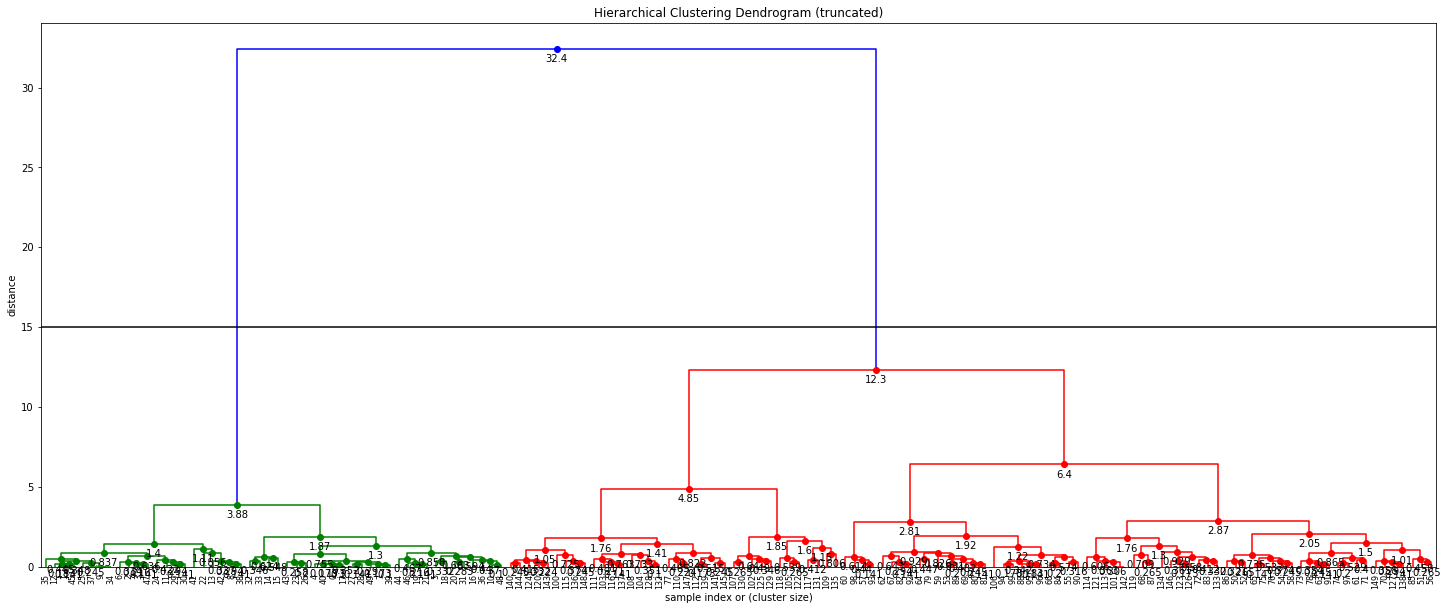

In [30]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
fancy_dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    max_d = 15
)
plt.show()

### 1.2. Comparison of the  `KMeans` and `MiniBatchKMeans`
-  http://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#sphx-glr-auto-examples-cluster-plot-mini-batch-kmeans-py

In [31]:
## Generate sample data
np.random.seed(1234)
centers = [[1,1], [-1,-1], [1,-1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std = 0.7)

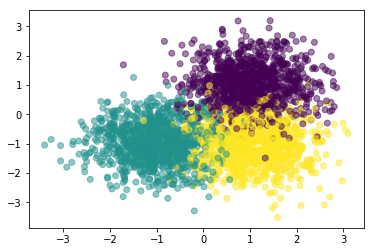

In [32]:
## Scatter plot
plt.scatter(X[:,0], X[:,1], c = labels_true, alpha = 0.5)

In [33]:
## Construct clusters with KMeans
k_means = KMeans(init='k-means++',
                 n_clusters=3,
                 n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

In [34]:
print(t_batch)

0.03940916061401367


In [35]:
## Construct clusters with MiniBatchKMeans
mbk = MiniBatchKMeans(init='k-means++',
                      n_clusters=3,
                      batch_size=45,
                      n_init=10,
                      max_no_improvement=10,
                      verbose=0)
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0

In [36]:
print(t_mini_batch)

0.021865129470825195


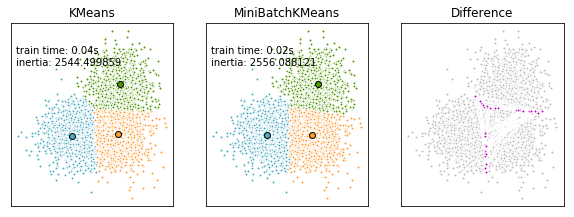

In [37]:
## Plot result
fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ['#4EACC5', '#FF9C34', '#4E9A06']

# We want to have the same colors for the same cluster from the
# MiniBatchKMeans and the KMeans algorithm. Let's pair the cluster centers per
# closest one.
k_means_cluster_centers = np.sort(k_means.cluster_centers_, axis=0)
mbk_means_cluster_centers = np.sort(mbk.cluster_centers_, axis=0)
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)
order = pairwise_distances_argmin(k_means_cluster_centers,
                                  mbk_means_cluster_centers)

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8,  'train time: %.2fs\ninertia: %f' % (
    t_batch, k_means.inertia_))

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == order[k]
    cluster_center = mbk_means_cluster_centers[order[k]]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)
ax.set_title('MiniBatchKMeans')
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, 'train time: %.2fs\ninertia: %f' %
         (t_mini_batch, mbk.inertia_))

# Initialise the different array to all False
different = (mbk_means_labels == 4)
ax = fig.add_subplot(1, 3, 3)

for k in range(n_clusters):
    different += ((k_means_labels == k) != (mbk_means_labels == order[k]))

identic = np.logical_not(different)
ax.plot(X[identic, 0], X[identic, 1], 'w',
        markerfacecolor='#bbbbbb', marker='.')
ax.plot(X[different, 0], X[different, 1], 'w',
        markerfacecolor='m', marker='.')
ax.set_title('Difference')
ax.set_xticks(())
ax.set_yticks(())

plt.show()

## 참고 (in official website of `scikit-learn`)
- Comparing different clustering algorithms on toy datasets: [Link](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py)
-  Empirical evaluation of the impact of k-means initialization: [Link](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_stability_low_dim_dense.html)